# Machine Learning Assignment 2

## Headers

In [2]:
import re

headers = []

with open("datadescription.txt", "r", encoding="utf-8") as file:
    col_num = 1
    for line in file:
        if f"{col_num} - " in line:
            match = re.search("[0-9] - (.*?)\w+", line)
            headers.append(match.group(0)[4:])
            col_num = col_num + 1
        # END IF
    # END FOR
# END WITH

cat_headers = ["job", "marital", "education", "default", "housing", "loan", "contact", "day", "month", "poutcome", "output"]

cont_headers = ["age", "balance", "duration", "campaign", "pdays", "previous"]
print(headers)

['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'output']


## Creating DataFrame

In [3]:
import pandas as pd

df = pd.read_csv("trainingset.txt", names=headers, na_values="unknown")
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
0,TR1,44,JobCat9,single,secondary,no,29,yes,no,NaN,5,may,0,1,-1,0,NaN,TypeA
1,TR2,31,JobCat4,married,secondary,no,2,yes,yes,NaN,5,may,0,1,-1,0,NaN,TypeA
2,TR3,42,JobCat4,divorced,tertiary,yes,2,yes,no,NaN,5,may,0,1,-1,0,NaN,TypeA
3,TR4,58,JobCat2,married,primary,no,121,yes,no,NaN,5,may,0,1,-1,0,NaN,TypeA
4,TR5,43,JobCat9,single,secondary,no,593,yes,no,NaN,5,may,0,1,-1,0,NaN,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24313,TR24314,36,JobCat9,married,secondary,no,557,yes,no,cellular,16,nov,0,4,-1,0,NaN,TypeB
24314,TR24315,53,JobCat6,married,tertiary,no,583,no,no,cellular,17,nov,0,1,184,4,success,TypeB
24315,TR24316,23,JobCat9,single,secondary,no,505,no,yes,cellular,17,nov,0,2,-1,0,NaN,TypeB
24316,TR24317,51,JobCat9,married,tertiary,no,825,no,no,cellular,17,nov,0,3,-1,0,NaN,TypeB


## Functions

In [4]:
import numpy as np

def getPercentage(amount, base, decimal=0):
  return round((amount / base) * 100, decimal)
# END getPercentage

def create_cat_quality_report(df, cat_features):
  features = []
  counts = []
  missing_percentages = []
  cardinalities = []
  modes = []
  mode_freqs = []
  mode_percentages = []
  second_modes = []
  second_mode_freqs = []
  second_mode_percentages = []

  for feature in cat_features:
    curr_feature = df[feature]
    features.append(feature)

    curr_value_counts = curr_feature.value_counts(dropna=False)

    # curr_full_count includes NaN values
    curr_full_count = curr_value_counts.sum()
    counts.append(curr_full_count)

    missing = curr_full_count - curr_feature.count()
    missing_percentages.append(getPercentage(missing, curr_full_count, 1))

    cardinalities.append(len(curr_value_counts.index))

    modes.append(curr_value_counts.index[0])
    mode_freqs.append(curr_value_counts.iloc[0])
    mode_percentages.append(getPercentage(curr_value_counts.iloc[0], curr_full_count, 1))

    second_modes.append(curr_value_counts.index[1])
    second_mode_freqs.append(curr_value_counts.iloc[1])
    second_mode_percentages.append(getPercentage(curr_value_counts.iloc[1], curr_full_count, 1))
  # END FOR

  return {
    "Feature": pd.Series(features),
    "Count": pd.Series(counts),
    "% Miss.": pd.Series(missing_percentages),
    "Cardinality": pd.Series(cardinalities),
    "Mode": pd.Series(modes),
    "Mode Freq.": pd.Series(mode_freqs),
    "Mode %": pd.Series(mode_percentages),
    "2nd Mode": pd.Series(second_modes),
    "2nd Mode Freq.": pd.Series(second_mode_freqs),
    "2nd Mode %": pd.Series(second_mode_percentages)
  }
# END create_cat_quality_report

def create_cont_quality_report(df, cont_features):
  counts = []
  missing_percentages = []
  cardinalities = []
  mins = []
  first_quarts = []
  means = []
  medians = []
  third_quarts = []
  maxes = []
  standard_deviations = []
  
  for feature in cont_features:
    curr_feature_series = cont_df[feature]

    curr_value_counts = curr_feature_series.value_counts(dropna=False)

    # curr_full_count includes NaN values
    curr_full_count = curr_value_counts.sum()
    counts.append(curr_full_count)

    missing = curr_full_count - curr_feature_series.count()
    missing_percentages.append(getPercentage(missing, curr_full_count, 1))

    cardinalities.append(len(curr_value_counts.index))

    mins.append(curr_feature_series.min())

    quantiles = curr_feature_series.quantile([0.25, 0.75])

    first_quarts.append(quantiles[0.25])

    means.append(curr_feature_series.mean()) 

    medians.append(curr_feature_series.median())

    third_quarts.append(quantiles[0.75])

    maxes.append(curr_feature_series.max())

    standard_deviations.append(curr_feature_series.std())
  # END FOR

  return {
    "Feature": pd.Series(cont_features),
    "Count": pd.Series(counts),
    "% Miss.": pd.Series(missing_percentages),
    "Card.": pd.Series(cardinalities),
    "Min": pd.Series(mins),
    "1st Qrt.": pd.Series(first_quarts),
    "Mean": pd.Series(means),
    "Median": pd.Series(medians),
    "3rd Qrt.": pd.Series(third_quarts),
    "Max": pd.Series(maxes),
    "Std. Dev": pd.Series(standard_deviations),
  }
# END create_cont_quality_report()

def getEqualFreq(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))
# END getEqualFreq

## Categorical Quality Report

### Create categorical quality report

In [6]:
cat_df = df[cat_headers].copy()
cat_df[:5]


cat_quality_report = create_cat_quality_report(df, cat_headers)
pd.DataFrame.from_dict(cat_quality_report)

,Feature,Count,% Miss.,Cardinality,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,job,24318,0.6,12,JobCat3,5197,21.4,JobCat6,5053,20.8
1,marital,24318,0.0,3,married,14639,60.2,single,6885,28.3
2,education,24318,4.0,4,secondary,12516,51.5,tertiary,7065,29.1
3,default,24318,0.0,2,no,23871,98.2,yes,447,1.8
4,housing,24318,0.0,2,yes,13528,55.6,no,10790,44.4
5,loan,24318,0.0,2,no,20350,83.7,yes,3968,16.3
6,contact,24318,29.0,3,cellular,15691,64.5,NaN,7051,29.0
7,day,24318,0.0,31,20,1503,6.2,18,1261,5.2
8,month,24318,0.0,12,may,7448,30.6,jul,3751,15.4
9,poutcome,24318,81.3,4,NaN,19762,81.3,failure,2730,11.2


### Cleaning data
- Dropped `poutcome` and `contact` due to high missing values
- Filled in other missing values in features using the feature's mode

In [7]:
dropped_headers = ["poutcome", "contact"]
df["job"].fillna(cat_quality_report["Mode"][0])
df["education"].fillna(cat_quality_report["Mode"][2])
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
0,TR1,44,JobCat9,single,secondary,no,29,yes,no,NaN,5,may,0,1,-1,0,NaN,TypeA
1,TR2,31,JobCat4,married,secondary,no,2,yes,yes,NaN,5,may,0,1,-1,0,NaN,TypeA
2,TR3,42,JobCat4,divorced,tertiary,yes,2,yes,no,NaN,5,may,0,1,-1,0,NaN,TypeA
3,TR4,58,JobCat2,married,primary,no,121,yes,no,NaN,5,may,0,1,-1,0,NaN,TypeA
4,TR5,43,JobCat9,single,secondary,no,593,yes,no,NaN,5,may,0,1,-1,0,NaN,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24313,TR24314,36,JobCat9,married,secondary,no,557,yes,no,cellular,16,nov,0,4,-1,0,NaN,TypeB
24314,TR24315,53,JobCat6,married,tertiary,no,583,no,no,cellular,17,nov,0,1,184,4,success,TypeB
24315,TR24316,23,JobCat9,single,secondary,no,505,no,yes,cellular,17,nov,0,2,-1,0,NaN,TypeB
24316,TR24317,51,JobCat9,married,tertiary,no,825,no,no,cellular,17,nov,0,3,-1,0,NaN,TypeB


## Continuous Quality Report

## Creating categorical quality report

In [4]:
cont_df = df[cont_headers].copy()
cont_df

,age,balance,duration,campaign,pdays,previous
0,44,29,0,1,-1,0
1,31,2,0,1,-1,0
2,42,2,0,1,-1,0
3,58,121,0,1,-1,0
4,43,593,0,1,-1,0
...,...,...,...,...,...,...
24313,36,557,0,4,-1,0
24314,53,583,0,1,184,4
24315,23,505,0,2,-1,0
24316,51,825,0,3,-1,0


In [6]:
cont_df = df[cont_headers].copy()
cont_quality_report = create_cont_quality_report(cont_df, cont_headers)
cont_report_df = pd.DataFrame.from_dict(cont_quality_report)
cont_report_df

,Feature,Count,% Miss.,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev
0,age,24318,0.0,75,16,31.0,39.907723,37.0,48.00,95,11.438238
1,balance,24318,0.0,5635,-8019,75.0,1347.709968,451.0,1420.25,81204,2944.383929
2,duration,24318,0.0,1,0,0.0,0.000000,0.0,0.00,0,0.000000
3,campaign,24318,0.0,42,1,1.0,2.769060,2.0,3.00,63,3.068752
4,pdays,24318,0.0,478,-1,-1.0,41.085945,-1.0,-1.00,842,100.490570
5,previous,24318,0.0,37,0,0.0,0.591126,0.0,0.00,58,1.976166


In [9]:
freq_series

0     -8019.0
1         0.0
2        23.0
3       131.0
4       272.0
5       451.0
6       707.0
7      1126.0
8      1862.4
9      3574.4
10    81204.0
dtype: float64

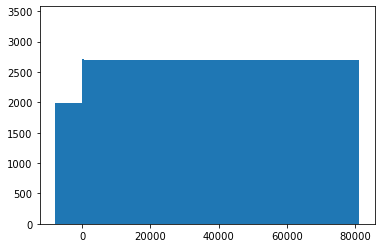

In [11]:
import matplotlib.pyplot as plt

cont_df["balance"]
frequencies = getEqualFreq(cont_df["balance"], 9)
freq_series = pd.Series(frequencies)
plt.hist(cont_df["balance"], frequencies)
plt.show()

In [142]:
balances = cont_df["balance"]

def create_bins_for_feature(feature: pd.Series, divisor_limit=20) -> dict[str, int]:
    feature = feature.sort_values()  
    feature_len = len(feature)
    
    increments = 0
    for divisor in range(divisor_limit, 0, -1):
        if feature_len % divisor == 0:
            increments = int(feature_len / divisor)
            break
        # END IF
    # END FOR

    bin_num = 0
    feature_bins = {}
    for i in range(0, feature_len, increments):
        feature_bins[f"bin{bin_num}"] = feature.iloc[i]
        bin_num = bin_num + 1
    # END FOR
    
    return feature_bins
# END create_bins_for_feature()

def create_binned_feature(feature: pd.Series, divisor_limit=20) -> (pd.Series, dict[str, int]):
    feature = feature.sort_values()  
    feature_len = len(feature)
    
    increments = 0
    for divisor in range(divisor_limit, 0, -1):
        if feature_len % divisor == 0:
            increments = int(feature_len / divisor)
            break
        # END IF
    # END FOR

    bin_num = 0
    feature_bins = {}
    feature_binned = feature.copy()
    for i in range(0, feature_len, increments):
        bin_str = f"bin{bin_num}"
        feature_bins[bin_str] = feature.iloc[i]
        bin_num = bin_num + 1
        for j in range(i, i+increments):
            feature_binned.iloc[j] = bin_str
        # print(feature_binned.iloc[0])
    # END FOR
    
    return feature_binned, feature_bins
# END create_bins_for_feature()

binned_features = {}
for cont_feature in cont_headers:
    binned_series, bins = create_binned_feature(cont_df[cont_feature])
    binned_features[cont_feature] = {"series": binned_series, "bins": bins}
# END FOR

df_copy = df.copy()

for key, value in binned_features.items():
    df_copy[key] = value["series"]
# END FOR

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
0,TR1,bin11,JobCat9,single,secondary,no,bin3,yes,no,NaN,5,may,bin0,bin0,bin0,bin0,NaN,TypeA
1,TR2,bin4,JobCat4,married,secondary,no,bin2,yes,yes,NaN,5,may,bin12,bin6,bin14,bin14,NaN,TypeA
2,TR3,bin10,JobCat4,divorced,tertiary,yes,bin2,yes,no,NaN,5,may,bin12,bin6,bin14,bin14,NaN,TypeA
3,TR4,bin16,JobCat2,married,primary,no,bin5,yes,no,NaN,5,may,bin12,bin6,bin14,bin14,NaN,TypeA
4,TR5,bin10,JobCat9,single,secondary,no,bin10,yes,no,NaN,5,may,bin12,bin6,bin14,bin14,NaN,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24313,TR24314,bin8,JobCat9,married,secondary,no,bin9,yes,no,cellular,16,nov,bin5,bin14,bin4,bin4,NaN,TypeB
24314,TR24315,bin15,JobCat6,married,tertiary,no,bin10,no,no,cellular,17,nov,bin5,bin6,bin16,bin17,success,TypeB
24315,TR24316,bin0,JobCat9,single,secondary,no,bin9,no,yes,cellular,17,nov,bin5,bin9,bin4,bin4,NaN,TypeB
24316,TR24317,bin14,JobCat9,married,tertiary,no,bin11,no,no,cellular,17,nov,bin13,bin13,bin3,bin3,NaN,TypeB


6991    -8019
8504    -6847
20800   -4057
1015    -3313
10051   -2827
13543   -2604
7837    -2282
13612   -2122
4210    -2049
5747    -1941
Name: balance, dtype: int64
[0 1 2 3 4 5 6 7 8 9]
0    hi
1    hi
2    hi
3    hi
4    hi
5    hi
6    hi
7    hi
8    hi
9    hi
Name: balance, dtype: object
